# Assignment 1 (100 points)

You are expected to complete this notebook with lines of code, plots, texts, and/or equations. In this assignment, you will encounter three kinds of questions:
- Coding questions (mark with red letter <font color='red'>**C**</font>) - this type of question requires you to provide an implementation of a certain task.
- Theoretical questions (mark with magneta letter <font color='magneta'>**T**</font>) - this type of question requires you to provide an answer with text or mathematical equations. When an equation is asked, you can write it in python/numpy syntax (using \`\`) or in latex syntax (using \$\$).
- Analysis questions (mark with blue letter <font color='blue'>**A**</font>) - this type of question requires an analysis of results that may include text, code and visualizations. The first questions of this type will be more explicit of what you should write. They will become more open-ended as the assignment goes on.

For assignment submission, you will submit the notebook file (.ipynb) through Canvas with cells executed and outputs visible. Your submitted notebook needs to follow these guidelines:

- No other packages than the ones already imported can be used.
- No other data than the ones provided should be used.
- The cell outputs present in your delivered notebook should be reproducible.
- Existing cells that require your input with code will be marked with comments `##your code starts here` and `##your code ends here` to specify where you need to write code.
- Your final delivery should **NOT** contain any additional modifications outside of the demarcations defined above. However, if needed for testing, please feel free to modify it and remember to reverse to its original state before you submit it.
- All code must be your own work. Code cannot be copied from external sources or another students. You may copy code from cells that were pre-defined in this notebook if you think it is useful for use in another question.
- All images must be generated from data generated in your code. Do **NOT** import/display images that are generated outside your code.
- Your analysis must be your own, but if you quote text or equations from another source please make sure to cite the appropriate references.

Other notes:
- Cells should be run in order, using Shift+Enter.
- Read all the provided code cells and its comments, as they contain variables and information that you may need to use to complete the notebook.
- Ends of questions are marked with **END**. 
- To create a text cell, create it with the "+" button and change its type from "Code" to "Markdown" using the upper menu. 
- To modify a text cell, double click on it.
- If you are interested, you can check detail on formatting markdown text here: https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
- A python/numpy/matplotlib tutorial that you might find useful: http://cs231n.github.io/python-numpy-tutorial/

# Ex. 0 - Setting up libraries and useful functions **(Total of 0 points)**

In [1]:
#install a few libraries that will be used
!pip3 install matplotlib
!pip3 install numpy
!pip3 install pandas
!pip3 install python-mnist

#import a few libraries. Numpy is named as np and pyplot in matplotlib as plt
import urllib.request
import pandas
import numpy as np
import matplotlib.pyplot as plt
import copy
from utils import *
#test_gradient, preprocess_medical_data, load_and_preprocess_mnist

#needed to plot plots with matplotlib in OSX
%matplotlib inline

#set numpy to raise exceptions when encountering numerical errors
np.seterr(all='raise')

{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

In [2]:
#this function is used to convert from integer encoding of labels to one hot encoding
# labels is an 1-D array with the integer labels from 0 to n_labels. 
def one_hot(labels, n_labels):
    return np.squeeze(np.eye(n_labels)[labels.reshape(-1)])

#Does the transpose of the last two axes of a tensor
def T(input_tensor):
    return np.swapaxes(input_tensor, -1, -2)

# Exercise 1 - Analyzing model capacity with a polynomial toy example **(Total of 30 points)**

This exercise will illustrate how validation error of a model evolves by changing model capacity. We are going to start with a simple example that follows a third degree polynomial.

## <font color='red'>Exercise 1.1(C)</font> (2 points)

In this section, you will implement a function, named `third_degree_polynomial`, that returns the output of a third degree polynomial. This function receives two numpy arrays, `x` and `coeffs`. If `coeffs` $= [a_0, a_1, a_2, a_3]$, the function should return an output array `y` in which $y_i = a_3\times x_i^3 + a_2\times x_i^2 + a_1\times x_i + a_0$ for $i$ sample. Note: the output array, `y`, should have shape of [N, 1] where N is the number of samples in `x`.

In [3]:
def third_degree_polynomial(x, coeffs):
    ##your code starts here
    X = np.array([np.ones(x.shape[0]), x[:,0], x[:,0]**2, x[:,0]**3]).T
    y = np.einsum('ik,ji->j',coeffs, X)
    return y.reshape(-1, 1)
    ##your code ends here

In [4]:
#test your function to make sure it is doing what is expected
validate_ex11(third_degree_polynomial)

Your third_degree_polynomial function seems to be returning the expected values


**END 1.1(C)**

We are going to set up data for Exercise 1.2-1.6 and 2. Please pay close attention to the names of the variables because you are going to need to use them in your code.

In [5]:
#Generating input data and target data for this exercise
#noise is added to data to make the fitting inexact

#coefficients of the third degree polynomial used to generate the data
coeffs_ex1 = np.array([[3.2,-1,5,-2.2]]).T

#Training data input (you are going to use for exercises 1 and 2)
x_ex1_train = np.expand_dims(np.arange(0,2,0.1), axis = 1)
x_ex1_val = np.expand_dims(np.arange(0,2,0.1), axis = 1)


#Target data
y_ex1_train = third_degree_polynomial(x_ex1_train, coeffs_ex1)
y_ex1_val = third_degree_polynomial(x_ex1_val,coeffs_ex1) 

#add noise to target data
np.random.seed(1)
epsilon_ex1 = 0.35
y_ex1_train = y_ex1_train + epsilon_ex1 * np.random.normal(size = x_ex1_train.shape)
y_ex1_val = y_ex1_val + epsilon_ex1 * np.random.normal(size = x_ex1_val.shape)

## <font color='red'>Exercise 1.2(C)</font> (5 points)
To fit polynomial functions to the data that we just generated, your task is to implement a polynomial least square fitting function, named `fit_func`, that receives 3 inputs (input array, target array, and the degree of the polynomial fitting function) and returns the coeffficients array (of shape [degree+1, 1]) of the polynomial fitting function. Moreover, a polynomial fitting function can be expressed in a closed-form solution. Hence, your `fit_func` needs to be implemented with the closed-form solution.

In [6]:
def fit_func(inputs, targets, degree):
    ##your code starts here
    X = []
    X.append(np.ones(inputs.shape[0]))
    for i in range(degree):
        X.append(inputs[:,0]**(i+1))
    X = np.array(X).T
    return np.linalg.inv(X.T @ X) @ X.T @ targets
    ##your code ends here

**END 1.2(C)**

In [7]:
#test your function to make sure it is doing what is expected
validate_ex12(fit_func, x_ex1_train, y_ex1_train)

Your fitting function seems to be returning the expected values


## <font color='red'>Exercise 1.3(C)</font> (4 points)
In exercise 1.1 above, we implement a third degree polynominal function. Now, we will generalize it to express the polynomial function of any degrees. In this section, you need to implement a function, named `any_degree_polynomial`, that receives two numpy arrays, `x` and `coeffs`, and computes the polynomial function value for each sample in `x`. For example, if `coeffs` $= [a_0,a_1,...,a_n]$, the function should return the value of $i$ sample as $y_i = a_n\times x_i^n + a_{n-1}\times x_i^{n-1} + ... + a_1\times x_i + a_0$. Note: the output array, `y`, should have shape of [N, 1] where N is the number of samples in `x`.

In [8]:
def any_degree_polynomial(x, constants_vector):
    ##your code starts here
    X = []
    X.append(np.ones(x.shape[0]))
    for i in range(constants_vector.shape[0]-1):
        X.append(x[:,0]**(i+1))
    X = np.array(X).T
    y = np.einsum('ik,ji->j',constants_vector, X)
    return y.reshape(-1, 1)
    ##your code ends here

**END 1.3(C)**

## <font color='red'>Exercise 1.4(C)</font> (4 points)
Now, you will use the functions above to fit a third degree polynomial to the provided data `(x_ex1_train,y_ex1_train)`, and plot your fitted results and the training data on the same graph. Please remember to use legend to identify what each curve is.

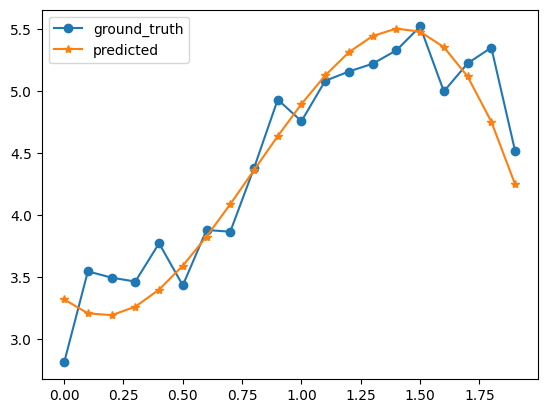

In [9]:
#Fit a 3rd degree polynomial to data and visualize the result of your fit
##your code starts here
W = fit_func(x_ex1_train, y_ex1_train, 3)
y_pred = any_degree_polynomial(x_ex1_val, W)
plt.figure()
plt.plot(x_ex1_val, y_ex1_val, 'o-', label="ground_truth")
plt.plot(x_ex1_val, y_pred, '*-', label="predicted")
plt.legend(loc="upper left")
plt.show()
##your code ends here

**END 1.4(C)**

In the next two exercises, we are going to evaluate how polynomials of different degrees perform in the validation data when fitted to the training data. 

## <font color='red'>Exercise 1.5(C) </font> (2 points)
First, we are going to define a function that returns the metric used to evaluate the results. For this exercise, we use the mean squared error function, which is defined as $\frac{1}{N}\sum{\left( \hat{y} - y \right)^{2}}$. Your task is to implement a function, named `mse`, that takes two numpy arrays (`predicted_values` and `targets`) as input and returns the mean squared error between them.

In [10]:
def mse(predicted_values, targets):
    ##your code starts here
    diff = predicted_values - targets
    return (1/targets.shape[0]) * np.sum(diff**2)
    ##your code ends here

In [11]:
#test your function to make sure it is doing what is expected
validate_ex15(mse, y_ex1_val[:20,:],y_ex1_train)

Your error function seems to be returning the expected values


**END 1.5(C)**

## <font color='magneta'>Exercise 1.6(T)</font> (3 points)
Maximum likelihood (ML) principle is a common way to derive a good estimator for different models. For example, we can use ML to derive the estimation of the coefficients of polynomial fitting functions. If using ML, what assumptions do we need to make in order to obtain the same estimated coefficients as using the mean squared error criterion in Exercise 1.5 above?

**Answers**
Under ML, the assumption we want to make here is that we are trying to estimate the conditional probability $p(\mathbf{y}|\mathbf{x})$ using a Gaussian distribution with a fixed variance and the estimated values as the mean of the Gaussian distribution.

**END 1.6(T)**

## <font color='blue'>Exercise 1.7(A)</font> (10 points)
Now, we are going to treat the degree of the fitting polynomial as a hyperparameter. In this section, you will:
1) Fit the training data, `x_ex1_train`, and validation data, `x_ex1_val`, using polynomials of degree 1 to 10. Then,plot the mean squared error as a function of polynomial degrees for both training data and validation data on the same graph.

2) Write a short analysis of the results presented in your plot, stating which degrees are overfitting and which are underfitting, and why.

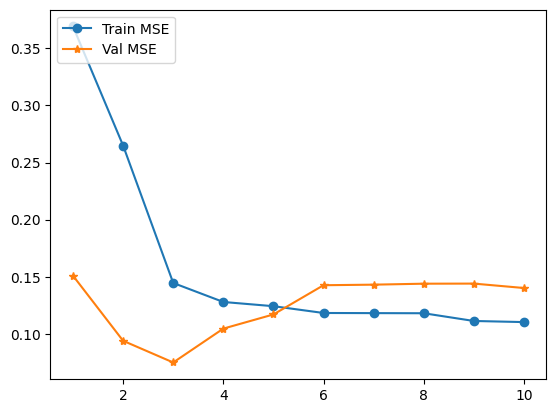

In [12]:
##your code starts here
plt.figure()
train_mse = []
val_mse = []
pd = []
for i in range(10):
    W = fit_func(x_ex1_train, y_ex1_train, i+1)
    y_val_pred = any_degree_polynomial(x_ex1_val, W)
    y_train_pred = any_degree_polynomial(x_ex1_train, W)
    train_mse.append(mse(y_train_pred, y_ex1_train))
    val_mse.append(mse(y_val_pred, y_ex1_val))
    pd.append(i+1)
plt.plot(pd, train_mse, 'o-', label="Train MSE")
plt.plot(pd, val_mse, '*-', label="Val MSE")
plt.legend(loc="upper left")
plt.show()

##your code ends here

**Write your analysis of the results here:** 

While the error in the training set decreases with larger degrees (and consequently larger capacity of the model), the error for the validation dataset reaches its minimum at the same degree as the originating polynomial. This shows the underfitting of the model when the fitted polynomial has a smaller degree than the originating one, and overfitting when the degree is larger.

**END 1.7(A)**

# Exercise 2 - Defining and training fully connected networks **(Total of 25 points)**

In this exercise, we are going to define functions to train a fully connected network with one hidden layer. First, we set a function to initialize the learnable parameters of the network. They are going to be arrays stored in a python dictionary in which the keys of the dictionary represent the name of the parameters of the network. The parameters are called 'weights_i' and 'bias_i' where i is the layer where the parameter is used. For the linear layer forward pass, we use the equation/notation $XW+b$, $X$ being a matrix with batch size as first dimension.

In [13]:
def initialize_parameters_ex2(n_inputs, n_hidden_nodes, n_outputs):
    np.random.seed(1)
    #initialize weights centered in 0
    weights_1 = np.random.normal(0,0.5,[n_inputs,n_hidden_nodes])
    # initialize bias with a small positive value to reduce amount of dead neurons
    bias_1 = np.random.normal(0.1,0,[n_hidden_nodes])
    #initialize weights centered in 0
    weights_2 = np.random.normal(0,0.5,[n_hidden_nodes,n_outputs])
    # initialize bias with a small positive value to reduce amount of dead neurons
    bias_2 = np.random.normal(0.1,0,[n_outputs])
    return {'weights_1':weights_1, 'weights_2':weights_2, 'bias_1':bias_1, 'bias_2':bias_2}

## <font color='magneta'>Exercise 2.1(T)</font> (1 points) 
Calculate the number of parameters of a network initialized with initialize_parameters_ex2 would have. Your answer needs to be expressed as a function of n_inputs, n_hidden_nodes and n_outputs.

**Put your final answer here:** `n_inputs*n_hidden_nodes+n_hidden_nodes+n_hidden_nodes*n_outputs+n_outputs`

**END 2.1(T)**

## <font color='red'>Exercise 2.2(C)</font> (4 points)
Complete the function, `two_layer_network_forward`, below to define a forward pass of a two-layer fully connected network with ReLU as the activation function of the first layer.

In [14]:
def two_layer_network_forward(inputs, parameters, return_intermediary_results = False):
    
    ##your code starts here    
    ## i-> input dims, n -> no. of examples, m -> no. of hidden layers, o -> output dims
    out_1 = np.einsum('im,ni->nm', parameters["weights_1"], inputs) + parameters["bias_1"]
    out_1_relu = np.maximum(0, out_1)
    out_2 = np.einsum('nm,mo->no', out_1_relu, parameters["weights_2"]) + parameters["bias_2"]
    ##your code ends here
    
    #return_intermediary_results should only be True if you are going to use this forward pass
    # to calculate gradients for the network parameters
    if return_intermediary_results:
        #if you are doing the forward pass to calculate backward pass afterwards, you are going to need all intermediary results
        to_return = {'out_1': out_1, 'out_1_relu': out_1_relu, 'out_2': out_2}
    else:
        #if you are doing the forward pass just to get the output of the network, you only need the final result
        to_return = out_2
    return to_return

In [15]:
#test your function to make sure it is doing what is expected
validate_ex22(two_layer_network_forward, initialize_parameters_ex2, x_ex1_train)

Your forward function seems to be returning the expected values


**END 2.2(C)**

## <font color='magneta'>Exercise 2.3(T)</font> (7 points) 
In this section, we will derive the derivaties of the parameters (in matrix form) of a feed-forward network using backpropagation algorithm. Given the two-layer network specified in Exercise 2.2 above, the network can be defined with the following operations where $\mathbf{x}, \mathbf{\hat{y}}$ are the input and output of the network, respectively:

$\mathbf{z} = \mathbf{x}\mathbf{w}_1 + \mathbf{b}_1$

$\mathbf{h} = relu(\mathbf{z})$

$\mathbf{\hat{y}} = \mathbf{h}\mathbf{w}_2 + \mathbf{b}_2$

Please derive the derivatives of the parameters in the network if the mean squared error is used as the cost function, i.e., $\frac{\partial L}{\partial\mathbf{W_1}}$, $\frac{\partial L}{\partial\mathbf{b_1}}$, $\frac{\partial L}{\partial\mathbf{W_2}}$, and $\frac{\partial L}{\partial\mathbf{b_2}}$. Note: You need to show a step-by-step of how you obtain each derivatives to receive full credit.



**Answers**

$\mathbf{\delta^L} = 2(\hat{\mathbf{y}} - \mathbf{y})$

$\frac{\partial L}{\partial\mathbf{b_2}} = \mathbf{\delta^L}$

$\frac{\partial L}{\partial\mathbf{w_2}} = \mathbf{h}^\top\mathbf{\delta^L}$

$\mathbf{\delta^h} = \mathbf{\delta^L}\mathbf{w}_2^\top$

$\mathbf{\delta^z} = \overrightarrow{1}_{z > 0}\odot\mathbf{\delta^h}$

$\frac{\partial L}{\partial\mathbf{b_1}} = \mathbf{\delta^z}$

$\frac{\partial L}{\partial\mathbf{w_1}} = \mathbf{x}^\top\mathbf{\delta^z}$

**END 2.3(T)**

## <font color='red'>Exercise 2.4(C)</font> (8 points) 
Now, you will implement two functions `mse_loss_backward` and `two_layer_network_backward` for the derivatives of the cost function and parameters of the network that you derive in Exercise 2.3.

In [16]:
def mse_loss_backward(predicted, gt):
    ##your code starts here
    derivative_of_mse_loss_with_respect_to_predicted = 2 * (predicted - gt) / predicted.shape[0]
    ##your code ends here
    return derivative_of_mse_loss_with_respect_to_predicted

def two_layer_network_backward(inputs, parameters, gt, loss_backward):
    
    intermediary_results_in_forward = two_layer_network_forward(inputs, parameters, return_intermediary_results = True)

    out_1 = intermediary_results_in_forward['out_1'] 
    out_1_relu = intermediary_results_in_forward['out_1_relu'] 
    out_2 = intermediary_results_in_forward['out_2'] 
    
    derivative_of_loss_with_respect_to_out_2 = loss_backward(out_2, gt) 
    
    ##your code starts here
    ## rewrite this part once again, check proper gradient of mse loss
    dl = derivative_of_loss_with_respect_to_out_2 
    derivative_of_loss_with_respect_to_bias_2 = np.sum(dl, axis=0)
    derivative_of_loss_with_respect_to_weights_2 = out_1_relu.T @ dl
    dh = dl @ parameters["weights_2"].T
    dz = np.einsum('ij,ij->ij', np.where(out_1.copy()>0, 1, 0), dh)
    derivative_of_loss_with_respect_to_bias_1 = np.sum(dz, axis=0)
    derivative_of_loss_with_respect_to_weights_1 = inputs.T @ dz
    
    ##your code ends here
    
    return {
            'weights_1': derivative_of_loss_with_respect_to_weights_1,
            'bias_1': derivative_of_loss_with_respect_to_bias_1, 
            'weights_2':derivative_of_loss_with_respect_to_weights_2 , 
            'bias_2':derivative_of_loss_with_respect_to_bias_2
            }

def two_layer_network_mse_backward(inputs, parameters, gt):
    return two_layer_network_backward(inputs, parameters, gt, mse_loss_backward)

In [17]:
#test your function to make sure it is doing what is expected
test_gradient(two_layer_network_forward, two_layer_network_mse_backward, mse, x_ex1_train[0:20,:], y_ex1_train[0:20,:], initialize_parameters_ex2(1, 10, 1) )

Analytical and numerical gradients are the same for all parameters


**END 2.4(C)**

## <font color='red'>Exercise 2.5(C)</font>  (5 points)
In this section, you are going to implement the update rule for a batch of training. Complete the function,`run_batch_sgd`, below that calculates the gradients and then updates the parameters using the vanilla stochastic gradient descent update rule. Then, you will use this function for the training process defined in the next cell and plot the results.

In [18]:
def run_batch_sgd(backward_function, parameters, learning_rate, inputs, targets):
    #calculate gradients and update parameters using sgd update rule
    ##your code starts here
    updated_parameters = {}
    gradients = backward_function(inputs, parameters, targets)
    for key, value in parameters.items():
        updated_parameters[key] = parameters[key] - learning_rate * gradients[key]
    ##your code ends here
    return updated_parameters

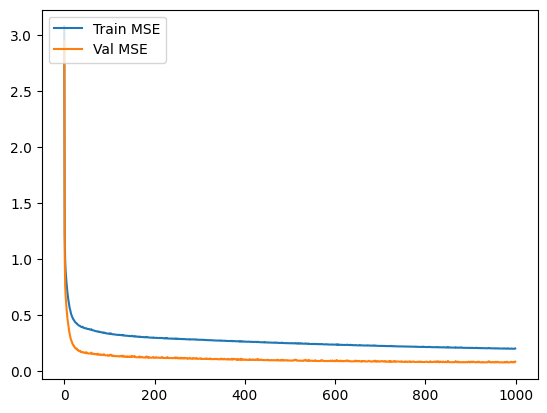

In [19]:
n_hidden_nodes = 50
parameters_two_layer_regression = initialize_parameters_ex2(1, n_hidden_nodes, 1)

learning_rate = 0.001
batch_size = 1
n_epochs = 1000
train_mse = []
val_mse = []

for epoch in range(n_epochs):
    shuffled_indexes = (np.arange(x_ex1_train.shape[0]))
    np.random.shuffle(shuffled_indexes)
    shuffled_indexes = np.array_split(shuffled_indexes,x_ex1_train.shape[0]//batch_size )
    for batch_i in range(len(shuffled_indexes)):
        batch = shuffled_indexes[batch_i]
        input_this_batch = x_ex1_train[batch,:]
        gt_this_batch =  y_ex1_train[batch,:]
        #use you function run_batch_sgd to update the parameters
        ##your code starts here
        parameters_two_layer_regression = run_batch_sgd(two_layer_network_mse_backward, \
            parameters_two_layer_regression, learning_rate, input_this_batch, gt_this_batch)
        
    train_mse.append(mse(two_layer_network_forward(x_ex1_train, parameters_two_layer_regression), y_ex1_train))
    val_mse.append(mse(two_layer_network_forward(x_ex1_val, parameters_two_layer_regression), y_ex1_val))
        ##your code ends here

#plot the results of training
##your code starts here
plt.figure()
plt.plot(np.arange(0, n_epochs), np.array(train_mse), label="Train MSE")
plt.plot(np.arange(0, n_epochs), np.array(val_mse), label="Val MSE")
plt.legend(loc="upper left")
plt.show()
##your code ends here

**END 2.5(C)**

# Exercise 3 - Classification task using a medical dataset with cross-entropy and softmax (Total of 22 points)

We are going to apply what we just defined in Exercise 2 to a real world application. The problem, that we want to solve here, is to predict if a patient had a seizure from a electroencephalogram (EEG) signal. We will use a dataset (https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition) that contains preprocessed 1-D EEG signals and corresponding labels, i.e., if the patients had seizure or not. Your task will be to implement a feed-forward network using functions defined in Exercise 2 to solve this problem and analyze the effect of hyperparameters having on the network's performance. Before we can begin the implementation of the network, we need to load and preprocess the data.

In [20]:
#read the csv file. Note: Please make sure the data_ex3.csv file is in the same directory
data_ex3 = pandas.read_csv('./data_ex3.csv')

#modify labels since we are going to do a binary classification, seizure or no seizure, 
# and presence of seizure is represented by label 1
data_ex3.y = data_ex3.y.map({1:1,2:0,3:0,4:0,5:0})

#visualizing the current table of the loaded dataset to see how it is organized
data_ex3[:5]

# preprocess the data you just loaded
train_data_ex3, val_data_ex3, test_data_ex3, train_labels_ex3, val_labels_ex3, test_labels_ex3 =  preprocess_medical_data(data_ex3)

In [21]:
#sanity check of the result of normalization, one-hot encoding and shapes of the data vectors
print('train_data_ex3:\n ' + str(train_data_ex3))
print('train_labels_ex3:\n ' + str(train_labels_ex3))
print('train_data_ex3.shape: ' + str(train_data_ex3.shape))
print('train_labels_ex3.shape: ' + str(train_labels_ex3.shape))
print('val_data_ex3.shape: ' + str(val_data_ex3.shape))
print('val_labels_ex3.shape: ' + str(val_labels_ex3.shape))
print('test_data_ex3.shape: ' + str(test_data_ex3.shape))
print('test_labels_ex3.shape: ' + str(test_labels_ex3.shape))

#checking how many of the labels are seizure labels
#the dataset is unbalanced, but you should use it just like that
print('Percentage of examples containing seizures: ' + str(np.sum(train_labels_ex3[:,1])/float(len(train_labels_ex3))*100) + '%')


train_data_ex3:
 [[ 0.1065911   0.09935479  0.09289118 ...  0.04474852  0.07432342
   0.10319802]
 [ 0.55446846  0.72344248  0.87263086 ...  2.02829977  2.45150835
   2.74325531]
 [ 0.3868953   0.39304312  0.34864579 ... -0.0452765  -0.0283758
  -0.01067506]
 ...
 [ 0.0669829   0.06264375  0.0461068  ... -0.15630735 -0.09482824
  -0.02865502]
 [-0.10973062 -0.15456323 -0.20964782 ...  0.0777577  -0.01629354
  -0.07660157]
 [-0.22855522 -0.22492606 -0.21276678 ... -0.41737991 -0.40292591
  -0.40024083]]
train_labels_ex3:
 [[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
train_data_ex3.shape: (6900, 178)
train_labels_ex3.shape: (6900, 2)
val_data_ex3.shape: (1725, 178)
val_labels_ex3.shape: (1725, 2)
test_data_ex3.shape: (2875, 178)
test_labels_ex3.shape: (2875, 2)
Percentage of examples containing seizures: 20.159420289855074%


Next, we are going to define a few more functions.

In [22]:
#a softmax calculation with numerical stability tricks
def softmax(logits, axis):
    # subtracting the maximum logit from all logits for each example and prevents overflow 
    # of the exponential function of the logits and does not change results of the softmax
    # because of properties of division of exponentials
    stabilizing_logits = logits - np.expand_dims(np.max(logits, axis = axis), axis = axis)
    
    # clipping all logits to a minimum of -10 prevents underflow of the exponentials and 
    # only changes the result of the softmax minimally, since we know that one logit has value 0
    # and exp^0>>exp(-10)
    stabilizing_logits = np.clip(stabilizing_logits, -10, None)
    
    #using the softmax classic equation, but with the modified logits to prevent numerical errors
    return np.exp(stabilizing_logits)/np.expand_dims(np.sum(np.exp(stabilizing_logits), axis = axis), axis = axis)

# a forward function combined the two-layer network and the softmax
def two_layer_network_softmax_forward(inputs, parameters):
    logits = two_layer_network_forward(inputs, parameters)
    return softmax(logits, axis = 1)

# a forward function combined the two-layer network and the softmax
def softmax_plus_ce_loss_backward(predicted, gt):
    #the derivative of the output of softmax function followed by a cross-entropy loss
    # with respect to the input is a beautifully simple equation equals to the softmax
    # of the inputs minus the one-hot encoded groundtruth
    return (softmax(predicted, axis = 1) - gt)/predicted.shape[0]

#the calculation of the gradient for the classification network
def two_layer_network_softmax_ce_backward(inputs, parameters, gt):
    return two_layer_network_backward(inputs, parameters, gt, softmax_plus_ce_loss_backward)

# a function to get how many logits predicted the right class when compared to gt
def count_correct_predictions(logits, gt):
    predicted_labels = one_hot(np.argmax(logits, axis = 1), logits.shape[1])
    return np.sum(np.logical_and(predicted_labels,gt))

## <font color='red'>Exercise 3.1(C)</font> (3 points)
Before putting together the training process, we need to define the loss function. Here, we are going to implement a cross-entropy loss between the predicted output and one-hot encoded target.

In [23]:
def ce_loss(predicted_output, target):
    ##your code starts here  
    loss_values = -np.sum(target * np.log(predicted_output), axis=1)
    return np.mean(loss_values)
    ##your code ends here

In [24]:
#test your function to make sure it is doing what is expected
validate_ex31(ce_loss,softmax, two_layer_network_softmax_forward, two_layer_network_softmax_ce_backward,\
             train_data_ex3[0:10,:], train_labels_ex3[0:10,:], initialize_parameters_ex2(178, 10, 2))

Your loss function seems to be returning the expected values
Analytical and numerical gradients are the same for all parameters


**END 3.1(C)**

## <font color='blue'>Exercise 3.2(A)</font> (16 points)
In this section, you will first put together the training process of a two-layer neural network. You should be able to get a validation accuracy higher than 96% with the provided learning rate, batch size, and number of epochs for this dataset. Then, you will analyze how the accuracy changes as a function of the number of hidden nodes.

Hints:
- Question 2.4 has code that may be useful here. 
- In addition to what the code in question 2.4 is doing, you will need to loop over different numbers of hidden nodes to train different models.
- Write the inference loops to get the training and the validation accuracy of your model. 
- For the accuracy calculation, you may find the provided `count_correct_predictions` function useful.

In [25]:
learning_rate = 0.01 
batch_size = 50
n_epochs = 100
parameters_two_layer_classification_dic = {}
n_hidden_nodes_arr = np.arange(20, 150, 10).astype(int)
for n_hidden_nodes in n_hidden_nodes_arr:
    parameters_two_layer_regression = initialize_parameters_ex2(len(train_data_ex3[0]), n_hidden_nodes, len(train_labels_ex3[0]))
    ##your code starts here
    for epoch in range(n_epochs):
        shuffled_indexes = (np.arange(train_data_ex3.shape[0]))
        np.random.shuffle(shuffled_indexes)
        shuffled_indexes = np.array_split(shuffled_indexes,train_data_ex3.shape[0]//batch_size )
        for batch_i in range(len(shuffled_indexes)):
            batch = shuffled_indexes[batch_i]
            input_this_batch = train_data_ex3[batch,:]
            gt_this_batch =  train_labels_ex3[batch,:]

            parameters_two_layer_regression = run_batch_sgd(two_layer_network_softmax_ce_backward, \
                parameters_two_layer_regression, learning_rate, input_this_batch, gt_this_batch)
            
    parameters_two_layer_classification_dic[n_hidden_nodes] = parameters_two_layer_regression
    accuracy = count_correct_predictions(two_layer_network_forward(val_data_ex3, parameters_two_layer_regression), val_labels_ex3) / val_labels_ex3.shape[0]
    print(f'Accuracy with hidden layers {n_hidden_nodes} = {accuracy}')
##your code ends here

Accuracy with hidden layers 20 = 0.9501449275362319
Accuracy with hidden layers 30 = 0.9617391304347827
Accuracy with hidden layers 40 = 0.9588405797101449
Accuracy with hidden layers 50 = 0.9559420289855073
Accuracy with hidden layers 60 = 0.9623188405797102
Accuracy with hidden layers 70 = 0.9628985507246377
Accuracy with hidden layers 80 = 0.9571014492753623
Accuracy with hidden layers 90 = 0.9634782608695652
Accuracy with hidden layers 100 = 0.9640579710144928
Accuracy with hidden layers 110 = 0.9553623188405798
Accuracy with hidden layers 120 = 0.9623188405797102
Accuracy with hidden layers 130 = 0.9628985507246377
Accuracy with hidden layers 140 = 0.9582608695652174


**Write your analysis here:** 

As expected, the validation accuracy reaches a peak in an intermediary value of hidden nodes, and thus of capacity of the network. Training accuracy increases with the number of hidden nodes. This shows that the network was overfitting for a number of nodes larger than approximately 100, and underfitting for less than that. The ideal number of nodes found for this network is approximately 100. A good learning rate found was 0.01 and a good number of epochs found was 100.

**END 3.2(A)**

## <font color='red'>Exercise 3.3(C)</font> (3 points)
Lastly, we will run the best model on the test set.

In [26]:
shuffled_indexes = (np.arange(test_data_ex3.shape[0]))
shuffled_indexes = np.array_split(shuffled_indexes,test_data_ex3.shape[0]//batch_size )
corrects = 0
total = 0
n_hidden_nodes = 100
for batch_i in range(len(shuffled_indexes)):
    batch = shuffled_indexes[batch_i]
    ## shouldn't two_layer_network_forward be two_layer_network_softmax_forward
    corrects += count_correct_predictions(two_layer_network_forward(test_data_ex3[batch], parameters_two_layer_classification_dic[n_hidden_nodes]), test_labels_ex3[batch])
    total += len(batch)
print('Test accuracy = ' + str(corrects/float(total)*100) + '%')

Test accuracy = 96.7304347826087%


**END 3.3(C)**

# Exercise 4 - MNIST and weight decay **(Total of 23 points)**

In this exercise, we are going to extend the two-layer neural network to another dataset. We are going to use a flattened and reduced MNIST dataset to train the network using L2 regularization. First, we need to load and preprocess the data:

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


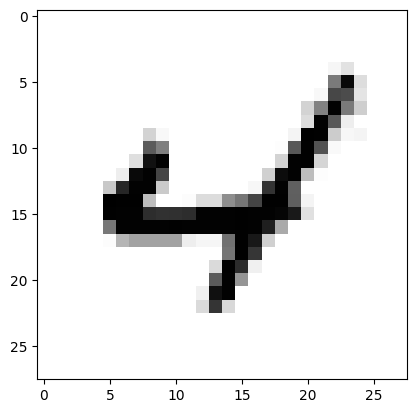

In [27]:
x_ex4_train, x_ex4_val, x_ex4_test, y_ex4_train, y_ex4_val, y_ex4_test = load_and_preprocess_mnist()

#sanity check to see that data is as it is supposed to be
plt.imshow(x_ex4_train[1000,:].reshape(28,28), cmap = 'Greys')
print(y_ex4_train[1000])

## <font color='red'>Exercise 4.1(C)</font> (4 points)
The $L_2$ penalty is defined as the sum of squares of every element of the penalized parameters. In this section, you will implement the gradients of different parameters in the network. We consider the $L_2$ penalty over all the weights parameters, and no penalty over the bias parameters.

In [28]:
def l2_regularization_backward(inputs, parameters, gt):
    gradients = {}
    for parameter_name in parameters.keys():
        if 'weights' in parameter_name:
            # complete the equation to calculate the l2 regularization loss gradient for weights
            ##your code starts here
            gradients[parameter_name] = parameters[parameter_name]*2
            ##your code ends here
        elif 'bias' in parameter_name:
            # complete the equation to calculate the l2 regularization loss gradient for bias.
            # Remember, the L2 regularization loss for bias is 0.
            ##your code starts here
            gradients[parameter_name] = np.zeros((parameters[parameter_name].shape))
            ##your code ends here
    return gradients

def two_layer_network_ce_and_l2_regularization_backward(inputs, parameters, gt, regularization_multiplier):
    gradients = {}
    gradients1 = two_layer_network_softmax_ce_backward(inputs, parameters, gt)
    gradients2 = l2_regularization_backward(inputs, parameters, gt)
    for parameter_name in parameters:
        gradients[parameter_name] = gradients1[parameter_name] + regularization_multiplier * gradients2[parameter_name]
    return gradients


**END 4.1(C)**

## <font color='blue'>Exercise 4.2(A)</font> (16 points)
In this section, you will analyze how the weight decay, $\lambda$, of the $L_2$ regularization changes the final results for the MNIST dataset using a two-layer neural network with 200 neurons in the hidden layer. 

Notes:
- You should play a bit with the learning rate, batch size and number of epochs.
- You shoulbe be able to get more than 90% accuracy on the validation set

Final Accuracy = 0.9168, with max of 0.9208


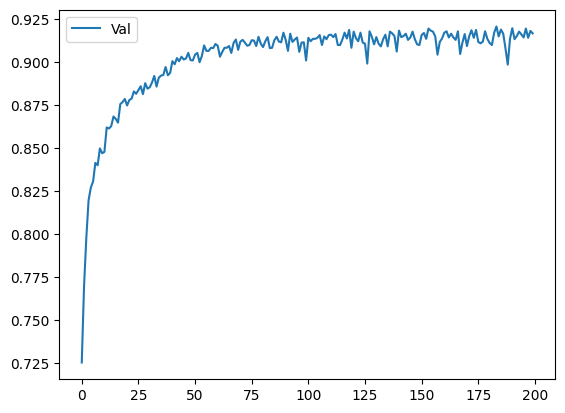

In [29]:
n_hidden_nodes = 200

##your code starts here

def run_batch_sgd_reg(backward_function, parameters, learning_rate, inputs, targets, regularization_multiplier):
    #calculate gradients and update parameters using sgd update rule
    ##your code starts here
    updated_parameters = {}
    gradients = backward_function(inputs, parameters, targets, regularization_multiplier)
    for key, value in parameters.items():
        updated_parameters[key] = parameters[key] - learning_rate * gradients[key]
    ##your code ends here
    return updated_parameters

learning_rate = 1e-1 
batch_size = 16
n_epochs = 200

parameters_two_layer_classification = initialize_parameters_ex2(len(x_ex4_train[0]), n_hidden_nodes, len(y_ex4_train[0]))

val_accuracy = []
end_epoch = n_epochs

##your code starts here
for epoch in range(n_epochs):
    shuffled_indexes = (np.arange(x_ex4_train.shape[0]))
    np.random.shuffle(shuffled_indexes)
    shuffled_indexes = np.array_split(shuffled_indexes,x_ex4_train.shape[0]//batch_size )
    for batch_i in range(len(shuffled_indexes)):
        batch = shuffled_indexes[batch_i]
        input_this_batch = x_ex4_train[batch,:]
        gt_this_batch =  y_ex4_train[batch,:]

        parameters_two_layer_classification = run_batch_sgd_reg(two_layer_network_ce_and_l2_regularization_backward, \
            parameters_two_layer_classification, learning_rate, input_this_batch, gt_this_batch, 0.001)
        
    accuracy = count_correct_predictions(two_layer_network_forward(x_ex4_val, parameters_two_layer_classification), y_ex4_val) / x_ex4_val.shape[0]
    val_accuracy.append(accuracy)


print(f'Final Accuracy = {accuracy}, with max of {max(val_accuracy)}')
plt.figure()
plt.plot(np.arange(0, end_epoch), np.array(val_accuracy), label="Val")
plt.legend(loc="upper left")
plt.show()
##your code ends here

**Write your analysis here:** 

Validation accuracy of > 90% was found for a regularization coefficient of 0.001, learning rate of 1e-1, batch size of 16. The network reached accuracy of 91.68% at the end of 200th epoch.

**END 4.2(A)**

## <font color='red'>Exercise 4.3(C)</font> (3 points)
Finally, test your best model using the provided test set.

In [30]:
shuffled_indexes = (np.arange(x_ex4_test.shape[0]))
shuffled_indexes = np.array_split(shuffled_indexes,x_ex4_test.shape[0]//batch_size )
corrects = 0
total = 0
for batch_i in range(len(shuffled_indexes)):
    batch = shuffled_indexes[batch_i]
    corrects += count_correct_predictions(two_layer_network_forward(x_ex4_test[batch], parameters_two_layer_classification), y_ex4_test[batch])
    total += len(batch)
print('Test accuracy = ' + str(corrects/float(total)*100) + '%')

Test accuracy = 92.24%


**END 4.3(C)**